### Coursera Capstone Notebook
This notebook will be used for coursera capstone project

In [6]:
import pandas as pd
import numpy as np

In [7]:
print("Hello Capstone Project Course")

Hello Capstone Project Course


### import the required libraries

In [8]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [45]:
import matplotlib.pyplot as plt

In [9]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

In [10]:
import folium # map rendering library

### Import the data from website
Here, wikipedia page on Singapore Metro network is used to retrive the data on all MRT lines

In [11]:
path = 'https://en.wikipedia.org/wiki/List_of_Singapore_MRT_stations'

In [12]:
df = pd.read_html(path, skiprows=1)[1]

In [13]:
df.head(150)

,In operation,Future,English • Malay,Chinese,Tamil,Opening,Name(s) during planning stages,Abbreviation,Location(s),Connection(s) to other transport
,North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL)
0,NS1 EW24,JE5,Jurong East,裕廊东,ஜூரோங் கிழக்கு,10 March 1990,Jurong East,JUR,Jurong East,Jurong East Temporary Bus Interchange
1,NS2,NaN,Bukit Batok,武吉巴督,புக்கிட் பாத்தோக்,10 March 1990,Bukit Batok South,BBT,Bukit Batok,Bukit Batok Bus Interchange
2,NS3,NaN,Bukit Gombak,武吉甘柏,புக்கிட் கோம்பாக்,10 March 1990,Bukit Batok North,BGB,Bukit Batok,NaN
3,NaN,NS3A,Brickland,红砖,பிரிக்லேன்ட்,Mid-2030s,Brickland,TBA,Exact location not yet known,NaN
4,NS4 BP1,JS1,Choa Chu Kang,蔡厝港,சுவா சூ காங்,10 March 1990,Choa Chu Kang,CCK,Choa Chu Kang,Choa Chu Kang Bus Interchange
5,NS5,NaN,Yew Tee,油池,இயூ டீ,10 February 1996,Choa Chu Kang North,YWT,Choa Chu Kang,NaN
6,NaN,NS6 DT,Sungei Kadut,双溪加株,சுங்கை கியாடுத்,Mid-2030s,Sungei Kadut,TBA,Sungei Kadut,NaN
7,NS7,NaN,Kranji,克兰芝,கிராஞ்சி,10 February 1996,Kranji,KRJ,Sungei Kadut,NaN
8,NS8,NaN,Marsiling,马西岭,மார்சிலிங்,10 February 1996,Woodlands West,MSL,Woodlands,NaN


In [14]:
df.columns.tolist() # checking the column names

[('In operation', 'North South Line (NSL)'),
 ('Future', 'North South Line (NSL)'),
 ('English • Malay', 'North South Line (NSL)'),
 ('Chinese', 'North South Line (NSL)'),
 ('Tamil', 'North South Line (NSL)'),
 ('Opening', 'North South Line (NSL)'),
 ('Name(s) during planning stages', 'North South Line (NSL)'),
 ('Abbreviation', 'North South Line (NSL)'),
 ('Location(s)', 'North South Line (NSL)'),
 ('Connection(s) to other transport', 'North South Line (NSL)')]

### create a dataframe 'spore' extracting only required columns

In [15]:
column_names = ['Location', 'MRT Line']
spore = pd.DataFrame(columns = column_names)

In [16]:
spore['Location'] = df['English • Malay', 'North South Line (NSL)']
spore['MRT Line'] = df['In operation', 'North South Line (NSL)']

In [17]:
spore = spore.dropna() # Cleaning up the dataframe to remove null values

### Extracting MRT stations only in the 'Downtown Line'

In [18]:
spore = spore[spore['MRT Line'].str.contains("DT")]

In [19]:
spore.reset_index(inplace=True)
spore.drop(['index'], axis=1, inplace=True)

In [20]:
spore.head()

,Location,MRT Line
0,Newton,NS21 DT11
1,Tampines,EW2 DT32
2,Bugis,EW12 DT14
3,Expo,CG1 DT35
4,Chinatown,NE4 DT19


In [21]:
spore = spore.drop(spore.index[0:12]) # remove the duplicate values

In [22]:
spore.reset_index(inplace=True) # reset index

In [23]:
spore.drop(['index'], axis=1, inplace=True)

In [24]:
spore.head()

,Location,MRT Line
0,Cashew,DT2
1,Hillview,DT3
2,Beauty World,DT5
3,King Albert Park,DT6
4,Sixth Avenue,DT7


## use geopy nominatim to extract the latitude & longitude values of locations required

In [25]:
geo = Nominatim(user_agent='Mypythonapi')
for idx,town in spore['Location'].iteritems():
    coord = geo.geocode(town + ' ' + "Singapore", timeout = 10)
    if coord:
        spore.loc[idx,'Latitude'] = coord.latitude
        spore.loc[idx,'Longitude'] = coord.longitude
    else:
        spore.loc[idx,'Latitude'] = 'NULL'
        spore.loc[idx,'Longitude'] = 'NULL'

In [26]:
spore.head()

,Location,MRT Line,Latitude,Longitude
0,Cashew,DT2,1.369291,103.764715
1,Hillview,DT3,1.362404,103.767427
2,Beauty World,DT5,1.341165,103.775769
3,King Albert Park,DT6,1.335934,103.783479
4,Sixth Avenue,DT7,1.330588,103.797229


### Define Foursquare Credentials and Version
After defining, explore the neighborhood of one of MRT station, Cashew

In [27]:
CLIENT_ID = 'ASVSJUCARFP2X0DMHVIA3GFWVNWUHY4VAZ0TRYQGXAFY4PNV' # your Foursquare ID
CLIENT_SECRET = 'N3GE4WV1BVMPKDPP5AG0ILDZN0YBHVXRCXLPTZ4UFDASKX4S' # your Foursquare Secret
VERSION = '20200501' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ASVSJUCARFP2X0DMHVIA3GFWVNWUHY4VAZ0TRYQGXAFY4PNV
CLIENT_SECRET:N3GE4WV1BVMPKDPP5AG0ILDZN0YBHVXRCXLPTZ4UFDASKX4S


In [28]:
neighborhood_latitude = spore.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = spore.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = spore.loc[0, 'Location'] # neighborhood name

print(f'Latitude and longitude values of {neighborhood_name} are {neighborhood_latitude}, {neighborhood_longitude}')

Latitude and longitude values of Cashew are 1.3692912, 103.76471480796098


## Exploring the neighborhood in Cashew MRT station in downtown line.
Let's get the top 100 venues that are in Cashew within a radius of 500 meters.

In [63]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [64]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eae6a24660a9f001b86ba75'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bukit Panjang',
  'headerFullLocation': 'Bukit Panjang, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 1.378291209000009,
    'lng': 103.77370057888123},
   'sw': {'lat': 1.3602911909999909, 'lng': 103.75572903704074}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54264a4b498e85a2c0a2e764',
       'name': 'iO Italian Osteria',
       'location': {'address': '#02-01, HillV2',
        'crossStreet': '4 Hillview Rise',
        'lat': 1.3629944307364283,
        'lng': 103.76452362632229,
        'label

In [65]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [66]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,iO Italian Osteria,Italian Restaurant,1.362994,103.764524
1,Stärker Frisches Bier,Beer Garden,1.362691,103.764436
2,Wine Connection Bistro,Bistro,1.363298,103.764575
3,Salvation Army,Thrift / Vintage Store,1.362407,103.767774
4,Cedele Bakery Kitchen,Café,1.363676,103.764875


In [33]:
nearby_venues.head()

,name,categories,lat,lng
0,Ga-Hock Seafood 佳福海鲜,Seafood Restaurant,1.372952,103.763434
1,Bus Stop 43111 (MINDEF),Bus Station,1.370771,103.763293
2,Bus Stop 43081 (Opp St. Joseph's Church),Bus Line,1.367144,103.765716
3,Hazel Park Garden ,Park,1.371654,103.764329
4,Assumption Pathway School Canteen,Food Court,1.371022,103.766496


## function to repeat the same process to all the neighborhoods in Downtown line

In [67]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [68]:
sg_venues = getNearbyVenues(names=spore['Location'],
                                   latitudes=spore['Latitude'],
                                   longitudes=spore['Longitude']
                                  )

Cashew
Hillview
Beauty World
King Albert Park
Sixth Avenue
Tan Kah Kee
Botanic Gardens • Kebun Bunga
Stevens
Newton
Little India
Rochor
Bugis
Promenade
Bayfront
Downtown
Telok Ayer
Chinatown
Fort Canning
Bencoolen
Jalan Besar
Bendemeer
Geylang Bahru
Mattar
MacPherson
Ubi
Kaki Bukit
Bedok North
Bedok Reservoir
Tampines West
Tampines
Tampines East
Upper Changi
Expo
Stevens
Expo


In [69]:
sg_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cashew,1.369291,103.764715,Ga-Hock Seafood 佳福海鲜,1.372952,103.763434,Seafood Restaurant
1,Cashew,1.369291,103.764715,Bus Stop 43111 (MINDEF),1.370771,103.763293,Bus Station
2,Cashew,1.369291,103.764715,Bus Stop 43081 (Opp St. Joseph's Church),1.367144,103.765716,Bus Line
3,Cashew,1.369291,103.764715,Hazel Park Garden ,1.371654,103.764329,Park
4,Cashew,1.369291,103.764715,Assumption Pathway School Canteen,1.371022,103.766496,Food Court


###  Check the number of restaurants for different cuisines along the downtown line

In [81]:
indian_res = sg_venues[(sg_venues['Venue Category'] == 'Indian Restaurant')].shape[0]
seafood_res = sg_venues[(sg_venues['Venue Category'] == 'Seafood Restaurant')].shape[0]
chinese_res = sg_venues[(sg_venues['Venue Category'] == 'Chinese Restaurant')].shape[0]
italian_res = sg_venues[(sg_venues['Venue Category'] == 'Italian Restaurant')].shape[0]

In [85]:
print(f'The number of Indian restaurants in downtown line are {indian_res}')
print(f'The number of Seafood restaurants in downtown line are {seafood_res}')
print(f'The number of Chinese restaurants in downtown line are {chinese_res}')
print(f'The number of Italian restaurants in downtown line are {italian_res}')

The number of Indian restaurants in downtown line are 50
The number of Seafood restaurants in downtown line are 21
The number of Chinese restaurants in downtown line are 63
The number of Italian restaurants in downtown line are 20


### Visualize the top 20 most common venues along downtown line

In [71]:
x = sg_venues.groupby(['Venue Category']).count()[['Neighborhood']].sort_values(by = 'Neighborhood', ascending=False).head(20)

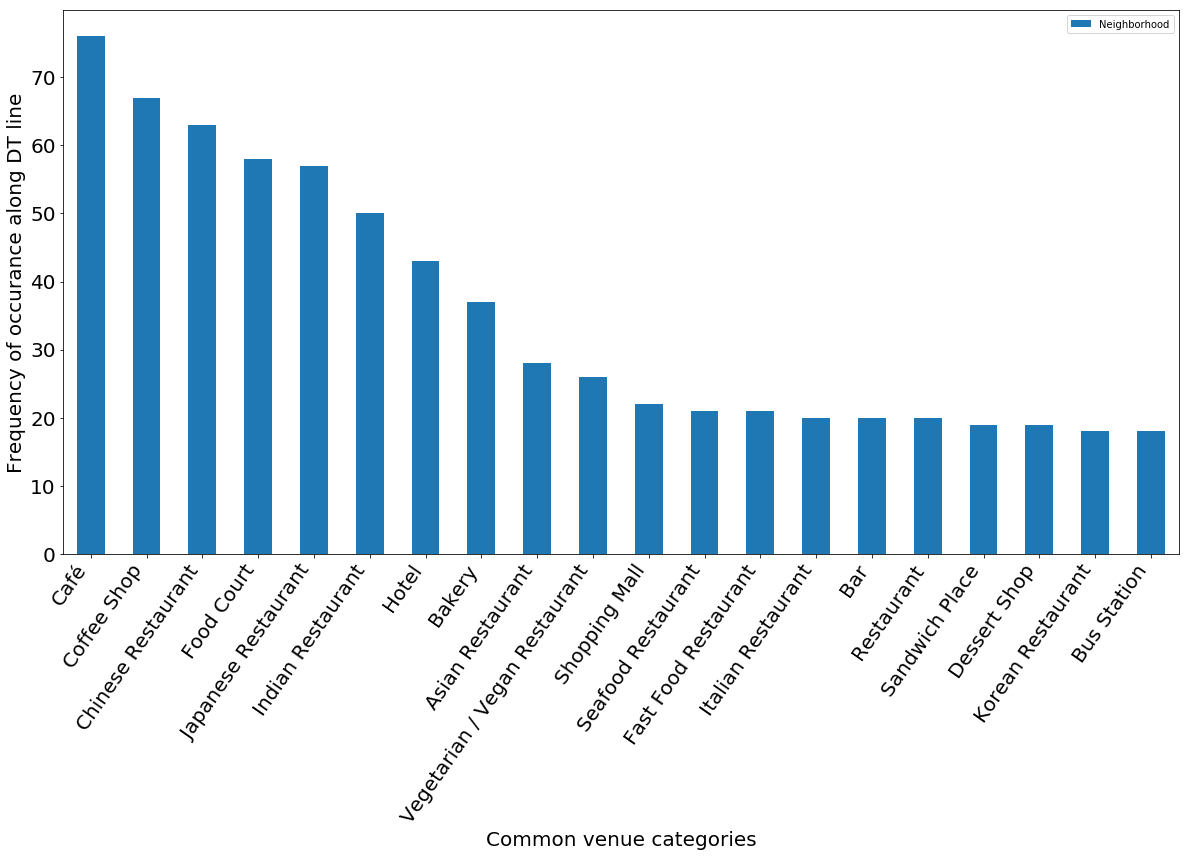

In [94]:
x.plot(kind='bar', figsize= (20,10))
plt.xlabel('Common venue categories', fontsize=20)
plt.xticks( ha='right', rotation=55, fontsize=20)
plt.ylabel('Frequency of occurance along DT line', fontsize=20)
plt.yticks( ha='right', fontsize=20)
plt.show()

# Results show most commonly occuring categories are cafes, coffee shops & restaurants

##  Now we will analyze each neighborhood (MRT station) though onehot encoding

In [95]:
sg_onehot = pd.get_dummies(sg_venues['Venue Category'])
sg_onehot.head()

,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
sg_onehot['Neighborhood'] = sg_venues['Neighborhood']

In [97]:
sg_onehot.head()

,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,...,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cashew
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cashew
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cashew
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cashew
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cashew


In [98]:
sg_grouped = sg_onehot.groupby('Neighborhood').mean().reset_index()
sg_grouped.head()

,Neighborhood,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Bayfront,0.020000,0.0,0.0,0.020000,0.020000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.04,0.000000,0.0,0.0,0.0,0.0
1,Beauty World,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.037975,0.0,0.0,...,0.012658,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
2,Bedok North,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.125000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
3,Bedok Reservoir,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
4,Bencoolen,0.013889,0.0,0.0,0.027778,0.027778,0.013889,0.013889,0.0,0.0,...,0.013889,0.0,0.0,0.0,0.00,0.013889,0.0,0.0,0.0,0.0


### Check what are top 5 fequently occuring venue category for each location

In [99]:
top = 5
for neighbor in sg_grouped['Neighborhood']:
    print(f'{neighbor}')
    temp = sg_grouped[sg_grouped['Neighborhood'] == neighbor].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top))
    print('\n')

Bayfront
            venue  freq
0           Hotel  0.08
1        Boutique  0.06
2          Garden  0.06
3  Scenic Lookout  0.06
4      Waterfront  0.04


Beauty World
                venue  freq
0                Café  0.11
1   Korean Restaurant  0.11
2  Chinese Restaurant  0.10
3          Food Court  0.05
4       Shopping Mall  0.04


Bedok North
                  venue  freq
0           Coffee Shop  0.25
1      Asian Restaurant  0.12
2            Steakhouse  0.06
3  Fast Food Restaurant  0.06
4  Other Great Outdoors  0.06


Bedok Reservoir
               venue  freq
0          Reservoir  0.25
1     Scenic Lookout  0.25
2           Bus Stop  0.25
3         Food Court  0.25
4  Accessories Store  0.00


Bencoolen
                 venue  freq
0                 Café  0.08
1  Japanese Restaurant  0.06
2                Hotel  0.06
3           Sports Bar  0.03
4          Gaming Cafe  0.03


Bendemeer
                           venue  freq
0                         Hostel  0.12
1             

## New dataframe and display the top 10 most common venues for each neighborhood.

In [100]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [116]:
top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sg_grouped['Neighborhood']

for ind in np.arange(sg_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_grouped.iloc[ind, :], top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayfront,Hotel,Garden,Boutique,Scenic Lookout,Lounge,Bar,Casino,Roof Deck,Waterfront,Japanese Restaurant
1,Beauty World,Café,Korean Restaurant,Chinese Restaurant,Food Court,Shopping Mall,Asian Restaurant,Thai Restaurant,Bus Line,Noodle House,Massage Studio
2,Bedok North,Coffee Shop,Asian Restaurant,Fast Food Restaurant,Bakery,Other Great Outdoors,Steakhouse,Supermarket,Bus Station,Park,Food Court
3,Bedok Reservoir,Reservoir,Food Court,Scenic Lookout,Bus Stop,Yoga Studio,Event Space,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
4,Bencoolen,Café,Hotel,Japanese Restaurant,Coffee Shop,Chinese Restaurant,Theater,Sports Bar,Restaurant,Bookstore,Gaming Cafe


## Use KMeans clustering to study the similarity of locations in downtown line & cluster them

In [117]:
# set number of clusters
kclusters = 7

sg_grouped_clustering = sg_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sg_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 3, 0, 0, 0, 0, 6, 0], dtype=int32)

In [118]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [119]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Bayfront,Hotel,Garden,Boutique,Scenic Lookout,Lounge,Bar,Casino,Roof Deck,Waterfront,Japanese Restaurant
1,0,Beauty World,Café,Korean Restaurant,Chinese Restaurant,Food Court,Shopping Mall,Asian Restaurant,Thai Restaurant,Bus Line,Noodle House,Massage Studio
2,2,Bedok North,Coffee Shop,Asian Restaurant,Fast Food Restaurant,Bakery,Other Great Outdoors,Steakhouse,Supermarket,Bus Station,Park,Food Court
3,3,Bedok Reservoir,Reservoir,Food Court,Scenic Lookout,Bus Stop,Yoga Studio,Event Space,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
4,0,Bencoolen,Café,Hotel,Japanese Restaurant,Coffee Shop,Chinese Restaurant,Theater,Sports Bar,Restaurant,Bookstore,Gaming Cafe


In [120]:
sg_merged = spore
sg_merged.rename(columns={"Location": "Neighborhood"}, inplace=True)

In [121]:
spore.head()

,Neighborhood,MRT Line,Latitude,Longitude
0,Cashew,DT2,1.369291,103.764715
1,Hillview,DT3,1.362404,103.767427
2,Beauty World,DT5,1.341165,103.775769
3,King Albert Park,DT6,1.335934,103.783479
4,Sixth Avenue,DT7,1.330588,103.797229


In [122]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sg_merged = sg_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sg_merged.head() # check the last columns!

,Neighborhood,MRT Line,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cashew,DT2,1.369291,103.764715,6,Bus Station,Food Court,Seafood Restaurant,Park,Bus Line,Trail,Exhibit,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
1,Hillview,DT3,1.362404,103.767427,0,Café,American Restaurant,Italian Restaurant,Pool,Shopping Mall,Supermarket,Coffee Shop,Ice Cream Shop,Gym,Sandwich Place
2,Beauty World,DT5,1.341165,103.775769,0,Café,Korean Restaurant,Chinese Restaurant,Food Court,Shopping Mall,Asian Restaurant,Thai Restaurant,Bus Line,Noodle House,Massage Studio
3,King Albert Park,DT6,1.335934,103.783479,0,Seafood Restaurant,Gas Station,Historic Site,Food Court,Soccer Field,Bus Line,Bus Stop,Bistro,Supermarket,Gourmet Shop
4,Sixth Avenue,DT7,1.330588,103.797229,0,Bakery,Coffee Shop,BBQ Joint,Indian Restaurant,Italian Restaurant,Building,Food Court,Spa,Bus Station,Bus Stop


In [123]:
#sg_merged.drop_duplicates(subset ="Neighborhood", 
 #                    keep = False, inplace = True)

### Display the cluster map using folium

In [124]:
latitude = 1.3521
longitude = 103.8198

In [125]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sg_merged['Latitude'], sg_merged['Longitude'], sg_merged['Neighborhood'], sg_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Study how the clustering has been done & the results

In [126]:
sg_merged.loc[sg_merged['Cluster Labels'] == 0, sg_merged.columns[[0] + list(range(5, sg_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Hillview,Café,American Restaurant,Italian Restaurant,Pool,Shopping Mall,Supermarket,Coffee Shop,Ice Cream Shop,Gym,Sandwich Place
2,Beauty World,Café,Korean Restaurant,Chinese Restaurant,Food Court,Shopping Mall,Asian Restaurant,Thai Restaurant,Bus Line,Noodle House,Massage Studio
3,King Albert Park,Seafood Restaurant,Gas Station,Historic Site,Food Court,Soccer Field,Bus Line,Bus Stop,Bistro,Supermarket,Gourmet Shop
4,Sixth Avenue,Bakery,Coffee Shop,BBQ Joint,Indian Restaurant,Italian Restaurant,Building,Food Court,Spa,Bus Station,Bus Stop
5,Tan Kah Kee,Café,Frozen Yogurt Shop,Train Station,Gourmet Shop,Bus Station,Thai Restaurant,Malay Restaurant,Shopping Mall,Toy / Game Store,Road
6,Botanic Gardens • Kebun Bunga,Asian Restaurant,Café,Indian Restaurant,Noodle House,Bakery,Shopping Mall,Spanish Restaurant,French Restaurant,Monument / Landmark,Gastropub
7,Stevens,Diner,Japanese Restaurant,Sandwich Place,Café,Metro Station,Gym,Boarding House,Fast Food Restaurant,Italian Restaurant,Filipino Restaurant
8,Newton,Chinese Restaurant,Seafood Restaurant,Italian Restaurant,Hotel Bar,Thai Restaurant,Convenience Store,Pool,Café,Food Court,Noodle House
10,Rochor,Indian Restaurant,Vegetarian / Vegan Restaurant,Art Gallery,Café,Chinese Restaurant,Hostel,Ice Cream Shop,Playground,Food Court,Gaming Cafe
11,Bugis,Bakery,Café,Chinese Restaurant,Hotel,Cocktail Bar,Dessert Shop,Coffee Shop,Vegetarian / Vegan Restaurant,Shopping Mall,Japanese Restaurant


In [127]:
sg_merged.loc[sg_merged['Cluster Labels'] == 1, sg_merged.columns[[0] + list(range(5, sg_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Mattar,Food Court,Asian Restaurant,Convenience Store,Basketball Court,Coffee Shop,Chinese Restaurant,Park,Soccer Field,Soup Place,Noodle House
23,MacPherson,Food Court,Metro Station,BBQ Joint,Furniture / Home Store,Paper / Office Supplies Store,Bus Station,Tea Room,Climbing Gym,Basketball Court,Hobby Shop
24,Ubi,Coffee Shop,Food Court,Asian Restaurant,Diner,Motorcycle Shop,BBQ Joint,Chinese Restaurant,Frozen Yogurt Shop,Field,Fried Chicken Joint
25,Kaki Bukit,Food Court,Furniture / Home Store,Bus Station,Coffee Shop,Convenience Store,Asian Restaurant,Restaurant,Boutique,Hobby Shop,Motorcycle Shop


In [128]:
sg_merged.loc[sg_merged['Cluster Labels'] == 2, sg_merged.columns[[0] + list(range(5, sg_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Geylang Bahru,Coffee Shop,Food Court,Chinese Restaurant,Asian Restaurant,Noodle House,Bus Station,Convenience Store,Dumpling Restaurant,Pool,Supermarket
26,Bedok North,Coffee Shop,Asian Restaurant,Fast Food Restaurant,Bakery,Other Great Outdoors,Steakhouse,Supermarket,Bus Station,Park,Food Court
30,Tampines East,Coffee Shop,Deli / Bodega,Malay Restaurant,South Indian Restaurant,Food Court,Bus Stop,Fast Food Restaurant,Betting Shop,Pet Store,Sandwich Place


In [129]:
sg_merged.loc[sg_merged['Cluster Labels'] == 3, sg_merged.columns[[0] + list(range(5, sg_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Bedok Reservoir,Reservoir,Food Court,Scenic Lookout,Bus Stop,Yoga Studio,Event Space,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant


In [130]:
sg_merged.loc[sg_merged['Cluster Labels'] == 4, sg_merged.columns[[0] + list(range(5, sg_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Little India,Indian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Hospital,Motel,Playground,Bakery,Museum,Coffee Shop,Rock Club


In [131]:
sg_merged.loc[sg_merged['Cluster Labels'] == 5, sg_merged.columns[[0] + list(range(5, sg_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Upper Changi,Bus Station,Yoga Studio,Sports Club,Housing Development,Karaoke Bar,Gym,Grocery Store,Multiplex,Fast Food Restaurant,Plaza


In [132]:
sg_merged.loc[sg_merged['Cluster Labels'] == 6, sg_merged.columns[[0] + list(range(5, sg_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cashew,Bus Station,Food Court,Seafood Restaurant,Park,Bus Line,Trail,Exhibit,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint


In [364]:
sg_merged.loc[sg_merged['Cluster Labels'] == 7, sg_merged.columns[[0] + list(range(5, sg_merged.shape[1]))]]

,MRT Line,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,DT30,Reservoir,Food Court,Scenic Lookout,Bus Stop,Yoga Studio,Event Space,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant


In [365]:
sg_merged.loc[sg_merged['Cluster Labels'] == 8, sg_merged.columns[[0] + list(range(5, sg_merged.shape[1]))]]

,MRT Line,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,DT34,Bus Station,Yoga Studio,Sports Club,Housing Development,Karaoke Bar,Gym,Grocery Store,Multiplex,Fast Food Restaurant,Plaza


In [367]:
sg_merged.loc[sg_merged['Cluster Labels'] == 9, sg_merged.columns[[0] + list(range(5, sg_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Rochor,Indian Restaurant,Vegetarian / Vegan Restaurant,Art Gallery,Café,Chinese Restaurant,Hostel,Ice Cream Shop,Playground,Food Court,Gaming Cafe
19,Jalan Besar,Indian Restaurant,Vegetarian / Vegan Restaurant,Bakery,Art Gallery,Food Court,Hostel,Chinese Restaurant,Sports Bar,Pop-Up Shop,Gaming Cafe
